In [40]:
# Processing Raw Data

import nltk, re, pprint
from nltk import word_tokenize

In [33]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)

str

In [34]:
len(raw)

1176967

In [35]:
raw[:75]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r'

In [41]:
tokens = word_tokenize(raw)
type(tokens)
len(tokens)
tokens[:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [44]:
couplet = """Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:"""
print(couplet)

Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:


In [45]:
a = [1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]
b = [' ' * 2 * (7 - i) + 'very' * i for i in a]
for line in b:
    print(line)

            very
          veryvery
        veryveryvery
      veryveryveryvery
    veryveryveryveryvery
  veryveryveryveryveryvery
veryveryveryveryveryveryvery
  veryveryveryveryveryvery
    veryveryveryveryvery
      veryveryveryvery
        veryveryvery
          veryvery
            very


In [46]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

In [50]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line)

Pruska Biblioteka Państwowa. Jej dawne zbiory znane pod nazwą
"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez
Niemców pod koniec II wojny światowej na Dolny Śląsk, zostały
odnalezione po 1945 r. na terytorium Polski. Trafiły do Biblioteki
Jagiellońskiej w Krakowie, obejmują ponad 500 tys. zabytkowych
archiwaliów, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.


In [58]:
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
[w for w in wordlist if re.search('ed$', w)]
['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted']
[w for w in wordlist if re.search('^..j..t..$', w)]
['abjectly', 'adjuster', 'dejected', 'dejectly', 'injector', 'majestic']

['abjectly', 'adjuster', 'dejected', 'dejectly', 'injector', 'majestic']

In [67]:
[w for w in wordlist if re.search('^[g-o]+$', w)]

chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [68]:
wsj = sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
['0.0085', '0.05', '0.1', '0.16', '0.2', '0.25', '0.28', '0.3', '0.4', '0.5',
'0.50', '0.54', '0.56', '0.60', '0.7', '0.82', '0.84', '0.9', '0.95', '0.99',
'1.01', '1.1', '1.125', '1.14', '1.1650', '1.17', '1.18', '1.19', '1.2']
[w for w in wsj if re.search('^[A-Z]+\$$', w)]
['C$', 'US$']
[w for w in wsj if re.search('^[0-9]{4}$', w)]
['1614', '1637', '1787', '1901', '1903', '1917', '1925', '1929', '1933']
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
['10-day', '10-lap', '10-year', '100-share', '12-point', '12-year']
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]
['black-and-white', 'bread-and-butter', 'father-in-law', 'machine-gun-toting',
'savings-and-loan']
[w for w in wsj if re.search('(ed|ing)$', w)]
['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing']

['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing']

In [69]:
word = 'supercalifragilisticexpialidocious'
re.findall(r'[aeiou]', word)

['u',
 'e',
 'a',
 'i',
 'a',
 'i',
 'i',
 'i',
 'e',
 'i',
 'a',
 'i',
 'o',
 'i',
 'o',
 'u']

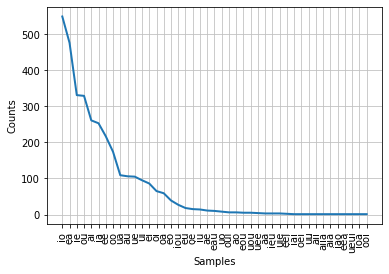

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [74]:
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj
                   for vs in re.findall(r'[aeiou]{2,}', word))
fd.most_common(12)
fd.plot()

In [87]:
[int(n) for n in re.findall(r'[0-9]+', '2009-12-31')]

[2009, 12, 31]

In [90]:
# Finding word stems

def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
        return word

In [92]:
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords is no basis for a system of government.
Supreme executive power derives from a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
[stem(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'ly',
 'in',
 'pond',
 'distribut',
 'sword',
 'i',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'Supreme',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

In [98]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone 
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'..."""

print(re.split(r'\W+', raw))

['', 'When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered', '']


In [97]:
print(re.findall(r'\w+|\S\w*', raw))

["'When", 'I', "'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'I", 'won', "'t", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '-', '-Maybe', 'it', "'s", 'always', 'pepper', 'that', 'makes', 'people', 'hot', '-tempered', ',', "'", '.', '.', '.']


In [96]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']


In [100]:
# SYMBOLS

# \b	Word boundary (zero width)
# \d	Any decimal digit (equivalent to [0-9])
# \D	Any non-digit character (equivalent to [^0-9])
# \s	Any whitespace character (equivalent to [ \t\n\r\f\v])
# \S	Any non-whitespace character (equivalent to [^ \t\n\r\f\v])
# \w	Any alphanumeric character (equivalent to [a-zA-Z0-9_])
# \W	Any non-alphanumeric character (equivalent to [^a-zA-Z0-9_])
# \t	The tab character
# \n	The newline character

In [101]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',', 
          'more', 'is', 'said', 'than', 'done', '.']
for word in saying:
    print(word, '(' + str(len(word)) + '),', end=' ')

After (5), all (3), is (2), said (4), and (3), done (4), , (1), more (4), is (2), said (4), than (4), done (4), . (1), 

In [102]:
from textwrap import fill
pieces = ["{} {}".format(word, len(word)) for word in saying]
output = ' '.join(pieces)
wrapped = fill(output)
print(wrapped)

After 5 all 3 is 2 said 4 and 3 done 4 , 1 more 4 is 2 said 4 than 4
done 4 . 1
